# Linear Regression Assignment
### by Anish Deshpande
### Problem Statement:
To build a multiple linear regression model for the prediction of demand for shared bikes

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19 they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

data = pd.read_csv('day.csv')

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

In [3]:
# Let's look at the shape
data.shape

(730, 16)

In [4]:
data.ndim

2

In [5]:
# Let's inspect the dataset

data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in our dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Let's get the statistical view of our dataset

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

Let's first remove unwanted variables from the dataset

- since we already have an index, we don't need the column instant

- 'dteday' contains date and year & month columns are sufficient to carry out our analysis as we are only calculating thr total count of bikes. Hence it is redundant.

- casual & registered: These columns tells about the category of customers. It is out of scope. So, removing those columns for analysis.

In [8]:
unwanted_cols = ['instant','dteday','casual','registered']

data.drop(columns=unwanted_cols,inplace=True)

We can see that there are few columns that are actually a categorical columns but interpreted using numbers. Let's convert them back to categorical column as it will help us later while scaling

In [9]:
# Season column
data['season'] = data['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Weather column
data['weathersit'] = data['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})

# Month column
data['mnth'] = data['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Weekday column
data['weekday'] = data['weekday'].replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

## Data Visualization

Let's visualize the numerical and categorical data to get some initial insights

- We have to check if all the variables are linearly related or not
- Checking if any multicollinearity that exists
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

<Figure size 400x400 with 0 Axes>

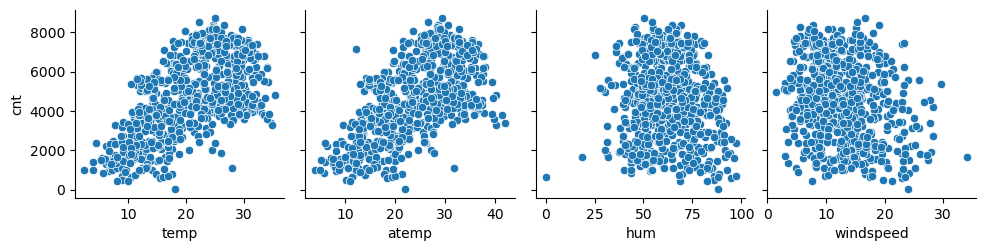

In [10]:
# We can use a pairplot to visualize numerical data

plt.figure(figsize=[4,4])
sns.pairplot(data = data, x_vars=['temp', 'atemp', 'hum','windspeed'],y_vars='cnt')
plt.show()

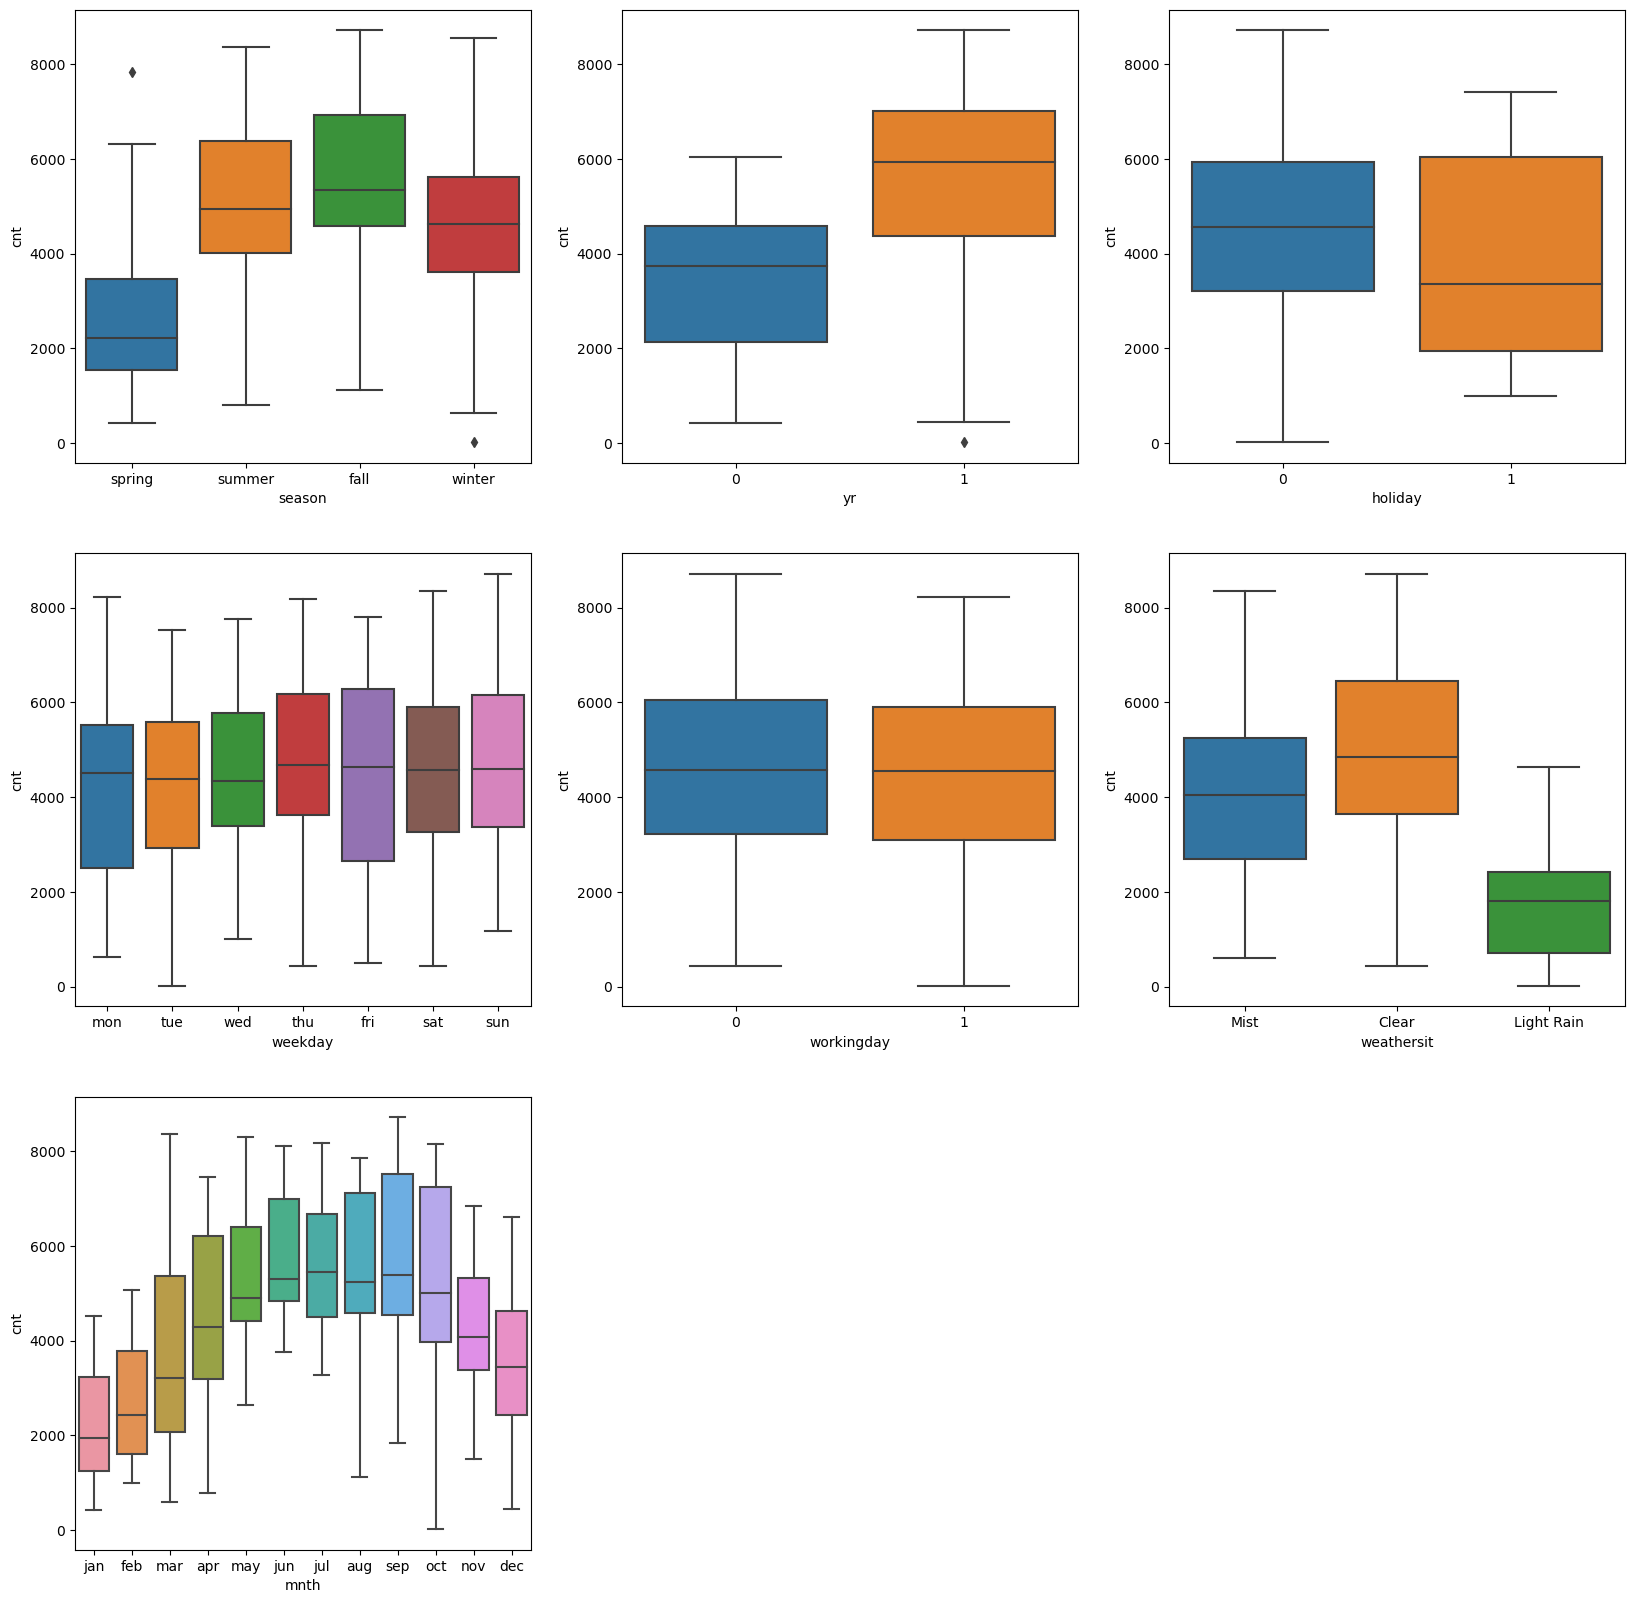

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x='mnth', y = 'cnt', data = data)
plt.show()

- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can see that the category 3 : Fall, has the highest median, which shows that the demand was high during fall season. It is least for 1: spring.
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week. Although, for thursday & friday, the median is little higher.
- The count of total users is in between 4000 to 6000 during clear weather
- The count is highest in the month of September
- The count of users is less during the holidays

## Data Preparation

The variables mnth ,weekday, season, weathersit have levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [12]:
# Let's get the dummy variables for the categorical columns

variables = ['season','mnth','weekday','weathersit']

dummy = pd.get_dummies(data[variables],drop_first = True)

dummy.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Merging the dummy variables with the original data

data = pd.concat([data,dummy],axis=1)

In [14]:
# Now we don't need those categorical variables, so it's time to drop them

data.drop(columns=variables,inplace=True)

In [15]:
data.head()       # New dataset

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into Train and Test

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size=0.7, test_size = 0.3, random_state=100)

In [17]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Scaling

The scale at which cnt and others such as atemp, temp are different in values.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very difficult to interpret the model. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [18]:
# Now we have to scale the variables appropriately

# Import the library
from sklearn.preprocessing import MinMaxScaler

# Identify the scaling variables
scale_vars = ['temp','atemp','hum','windspeed','cnt']

# Initiate the scaler
scaler = MinMaxScaler()

#Scale the variables
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [19]:
# The max values of all the columns must be equal to 1

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Perfect!!

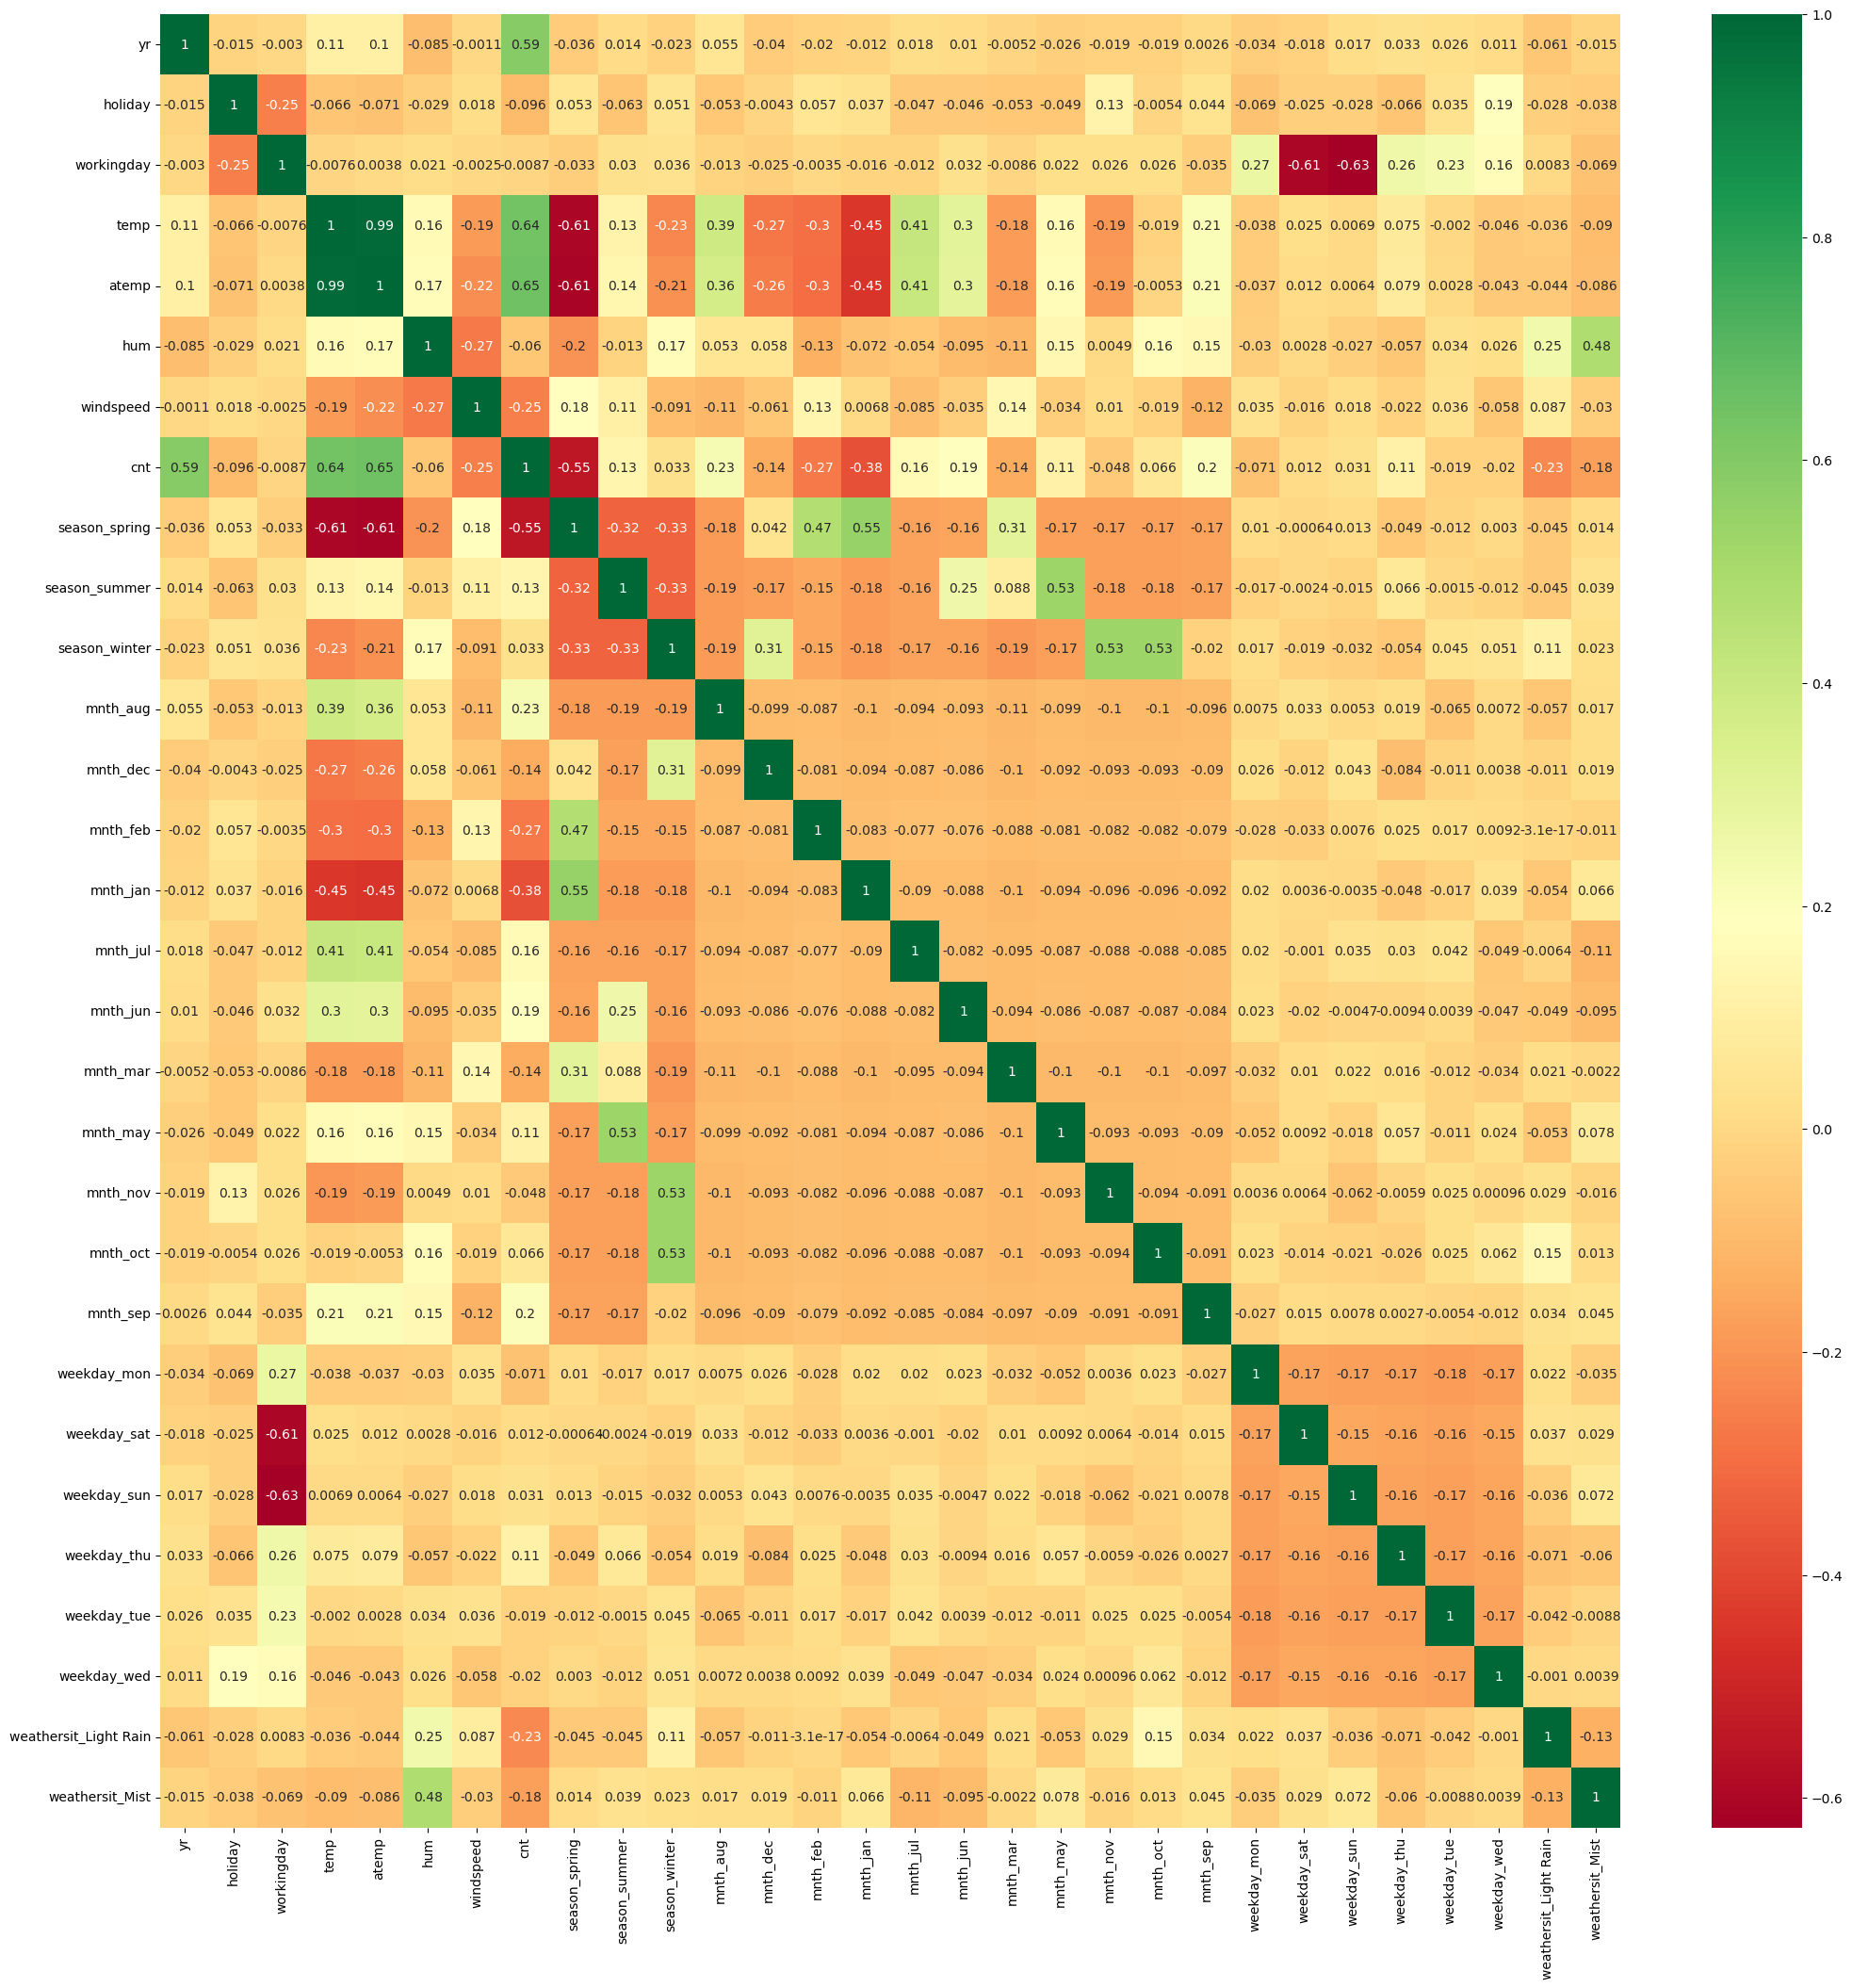

In [20]:
plt.figure(figsize=[25,25])
sns.heatmap(data=df_train.corr(),cmap='RdYlGn',annot=True)
plt.show()

## Model Building

Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

In [21]:
y_train = df_train.pop('cnt')
x_train = df_train

#### Feature Selection

We start with 25 variables.

We need to use the LinearRegression function from sklearn for its compatibility with RFE

In [22]:
# Importing the library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Buidling a linear regression model using sklearn
lm = LinearRegression()
lm.fit(x_train,y_train)

# Selecting top 15 features that influence the model
rfe = RFE(estimator=lm,n_features_to_select = 25)
rfe = rfe.fit(x_train,y_train)

In [23]:
list(zip(x_train, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 4),
 ('mnth_mar', False, 5),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 3),
 ('weekday_tue', True, 1),
 ('weekday_wed', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [24]:
cols = x_train.columns[rfe.support_]

print(cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')


In [25]:
x_train.columns[~rfe.support_]

Index(['mnth_jun', 'mnth_mar', 'mnth_oct', 'weekday_thu'], dtype='object')

In [26]:
x_train_new = x_train[cols]

##### Adding a constant
we have to fit a constant, otherwise the regression line starts from origin

In [27]:
# Importing the libraries
import statsmodels.api as sm

# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_1 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.81e-182
Time:                        22:31:05   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3988      0.082      4.835      0.000       0.237       0.561
yr                        0.2309      0.008     28.644      0.000       0.215       0.247
holiday                  -0.1352      0.065     -2.075      0.039      -0.263      -0.007
workingday               -0.0609      0.071     -0.862      0.389      -0.200       0.078
temp                      0.4015      0.136      2.953      0.003       0.134       0.669
atemp                     0.0461      0.137      0.336      0.737      -0.224       0.316
hum                      -0.1575      0.038     -4.130      0.000      -0.232      -0.083
windspeed                -0.1812      0.026     -6.903      0.000      -0.233      -0.130
season_spring            -0.0451      0.027     -1.676      0.094      -0.098       0.008
season_summer             0.0399      0.024      1.695      0.091      -0.006       0.086
season_winter             0.1128      0.023      4.913      0.000       0.068       0.158
mnth_aug                  0.0201      0.024      0.842      0.400      -0.027       0.067
mnth_dec                 -0.0498      0.018     -2.722      0.007      -0.086      -0.014
mnth_feb                 -0.0386      0.022     -1.786      0.075      -0.081       0.004
mnth_jan                 -0.0650      0.021     -3.034      0.003      -0.107      -0.023
mnth_jul                 -0.0367      0.025     -1.477      0.140      -0.085       0.012
mnth_may                  0.0239      0.018      1.366      0.173      -0.010       0.058
mnth_nov                 -0.0465      0.019     -2.435      0.015      -0.084      -0.009
mnth_sep                  0.0833      0.022      3.861      0.000       0.041       0.126
weekday_mon              -0.0264      0.012     -2.115      0.035      -0.051      -0.002
weekday_sat              -0.0582      0.071     -0.820      0.413      -0.198       0.081
weekday_sun              -0.0522      0.071     -0.737      0.461      -0.192       0.087
weekday_tue              -0.0283      0.013     -2.244      0.025      -0.053      -0.004
weekday_wed              -0.0131      0.013     -0.981      0.327      -0.039       0.013
weathersit_Light Rain    -0.2514      0.026     -9.504      0.000      -0.303      -0.199
weathersit_Mist          -0.0594      0.010     -5.673      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       79.109   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.296
Skew:                          -0.771   Prob(JB):                     3.56e-46
Kurtosis:                       5.734   Cond. No.                         89.4
==============================================================================

Defining a function to calculate Variance Inflation Factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(col):
    vif = pd.DataFrame()
    vif['Features'] = col.columns
    vif['VIF'] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF',ascending=False)
    return vif

In [29]:
# Checking VIF(Variance Inflation Factor) for multicollinearity

vif(x_train_new)

,Features,VIF
0,yr,2.11
1,holiday,2.57
2,workingday,54.51
3,temp,401.01
4,atemp,374.57
5,hum,39.26
6,windspeed,5.73
7,season_spring,10.30
8,season_summer,8.05
9,season_winter,7.94


atemp column has a p-value of 0.737. We need to drop it

In [30]:
x_train_new.drop(columns='atemp',inplace=True)

In [31]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model without atemp variable
model_2 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.71e-183
Time:                        22:31:05   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3985      0.082      4.836      0.000       0.237       0.560
yr                        0.2309      0.008     28.669      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.080      0.038      -0.263      -0.007
workingday               -0.0607      0.071     -0.859      0.391      -0.200       0.078
temp                      0.4453      0.039     11.496      0.000       0.369       0.521
hum                      -0.1568      0.038     -4.122      0.000      -0.232      -0.082
windspeed                -0.1830      0.026     -7.118      0.000      -0.233      -0.132
season_spring            -0.0444      0.027     -1.657      0.098      -0.097       0.008
season_summer             0.0407      0.023      1.734      0.083      -0.005       0.087
season_winter             0.1136      0.023      4.978      0.000       0.069       0.158
mnth_aug                  0.0195      0.024      0.819      0.413      -0.027       0.066
mnth_dec                 -0.0497      0.018     -2.722      0.007      -0.086      -0.014
mnth_feb                 -0.0386      0.022     -1.790      0.074      -0.081       0.004
mnth_jan                 -0.0652      0.021     -3.047      0.002      -0.107      -0.023
mnth_jul                 -0.0367      0.025     -1.479      0.140      -0.085       0.012
mnth_may                  0.0237      0.017      1.356      0.176      -0.011       0.058
mnth_nov                 -0.0464      0.019     -2.435      0.015      -0.084      -0.009
mnth_sep                  0.0833      0.022      3.866      0.000       0.041       0.126
weekday_mon              -0.0264      0.012     -2.118      0.035      -0.051      -0.002
weekday_sat              -0.0583      0.071     -0.822      0.411      -0.198       0.081
weekday_sun              -0.0520      0.071     -0.735      0.463      -0.191       0.087
weekday_tue              -0.0283      0.013     -2.245      0.025      -0.053      -0.004
weekday_wed              -0.0131      0.013     -0.983      0.326      -0.039       0.013
weathersit_Light Rain    -0.2521      0.026     -9.560      0.000      -0.304      -0.200
weathersit_Mist          -0.0595      0.010     -5.686      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.598   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.793
Skew:                          -0.766   Prob(JB):                     7.56e-46
Kurtosis:                       5.726   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [32]:
vif(x_train_new)

,Features,VIF
0,yr,2.11
1,holiday,2.57
2,workingday,54.51
3,temp,29.71
4,hum,39.16
5,windspeed,5.50
6,season_spring,10.24
7,season_summer,7.98
8,season_winter,7.86
9,mnth_aug,3.44


weekday_sun has a p-value of 0.463 which is not acceptable. We need to drop the same

In [33]:
x_train_new.drop(columns='weekday_sun',inplace=True)

In [34]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model without weekday_sun
model_3 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.37e-184
Time:                        22:31:05   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3458      0.041      8.513      0.000       0.266       0.426
yr                        0.2312      0.008     28.775      0.000       0.215       0.247
holiday                  -0.0924      0.028     -3.244      0.001      -0.148      -0.036
workingday               -0.0097      0.013     -0.744      0.457      -0.035       0.016
temp                      0.4461      0.039     11.529      0.000       0.370       0.522
hum                      -0.1557      0.038     -4.098      0.000      -0.230      -0.081
windspeed                -0.1835      0.026     -7.144      0.000      -0.234      -0.133
season_spring            -0.0441      0.027     -1.646      0.100      -0.097       0.009
season_summer             0.0407      0.023      1.739      0.083      -0.005       0.087
season_winter             0.1133      0.023      4.970      0.000       0.069       0.158
mnth_aug                  0.0191      0.024      0.805      0.421      -0.028       0.066
mnth_dec                 -0.0495      0.018     -2.710      0.007      -0.085      -0.014
mnth_feb                 -0.0382      0.022     -1.773      0.077      -0.081       0.004
mnth_jan                 -0.0649      0.021     -3.038      0.003      -0.107      -0.023
mnth_jul                 -0.0371      0.025     -1.496      0.135      -0.086       0.012
mnth_may                  0.0234      0.017      1.339      0.181      -0.011       0.058
mnth_nov                 -0.0477      0.019     -2.512      0.012      -0.085      -0.010
mnth_sep                  0.0835      0.022      3.874      0.000       0.041       0.126
weekday_mon              -0.0259      0.012     -2.078      0.038      -0.050      -0.001
weekday_sat              -0.0074      0.015     -0.487      0.626      -0.037       0.023
weekday_tue              -0.0274      0.013     -2.189      0.029      -0.052      -0.003
weekday_wed              -0.0118      0.013     -0.893      0.373      -0.038       0.014
weathersit_Light Rain    -0.2519      0.026     -9.558      0.000      -0.304      -0.200
weathersit_Mist          -0.0595      0.010     -5.687      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.045
Skew:                          -0.771   Prob(JB):                     4.92e-45
Kurtosis:                       5.687   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

weekday_sat has a p-value of 0.626 which is not acceptable. We need to drop the same

In [35]:
x_train_new.drop(columns='weekday_sat',inplace=True)

In [36]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_4 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.32e-185
Time:                        22:31:05   Log-Likelihood:                 523.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3425      0.040      8.557      0.000       0.264       0.421
yr                        0.2313      0.008     28.824      0.000       0.216       0.247
holiday                  -0.0893      0.028     -3.218      0.001      -0.144      -0.035
workingday               -0.0061      0.011     -0.568      0.571      -0.027       0.015
temp                      0.4458      0.039     11.531      0.000       0.370       0.522
hum                      -0.1557      0.038     -4.101      0.000      -0.230      -0.081
windspeed                -0.1832      0.026     -7.141      0.000      -0.234      -0.133
season_spring            -0.0445      0.027     -1.665      0.097      -0.097       0.008
season_summer             0.0404      0.023      1.728      0.085      -0.006       0.086
season_winter             0.1131      0.023      4.965      0.000       0.068       0.158
mnth_aug                  0.0188      0.024      0.792      0.429      -0.028       0.065
mnth_dec                 -0.0493      0.018     -2.703      0.007      -0.085      -0.013
mnth_feb                 -0.0380      0.022     -1.764      0.078      -0.080       0.004
mnth_jan                 -0.0649      0.021     -3.041      0.002      -0.107      -0.023
mnth_jul                 -0.0371      0.025     -1.497      0.135      -0.086       0.012
mnth_may                  0.0233      0.017      1.335      0.183      -0.011       0.058
mnth_nov                 -0.0482      0.019     -2.545      0.011      -0.085      -0.011
mnth_sep                  0.0833      0.022      3.869      0.000       0.041       0.126
weekday_mon              -0.0259      0.012     -2.078      0.038      -0.050      -0.001
weekday_tue              -0.0274      0.013     -2.190      0.029      -0.052      -0.003
weekday_wed              -0.0117      0.013     -0.888      0.375      -0.038       0.014
weathersit_Light Rain    -0.2524      0.026     -9.594      0.000      -0.304      -0.201
weathersit_Mist          -0.0594      0.010     -5.682      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       77.413   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.812
Skew:                          -0.761   Prob(JB):                     2.48e-44
Kurtosis:                       5.671   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

workingday has a p-valueof 0.571 which is not acceptable. We need to drop it

In [37]:
x_train_new.drop(columns='workingday',inplace=True)

In [38]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_5 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.36e-186
Time:                        22:31:05   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3396      0.040      8.562      0.000       0.262       0.417
yr                        0.2314      0.008     28.848      0.000       0.216       0.247
holiday                  -0.0837      0.026     -3.227      0.001      -0.135      -0.033
temp                      0.4457      0.039     11.537      0.000       0.370       0.522
hum                      -0.1568      0.038     -4.138      0.000      -0.231      -0.082
windspeed                -0.1832      0.026     -7.146      0.000      -0.234      -0.133
season_spring            -0.0442      0.027     -1.654      0.099      -0.097       0.008
season_summer             0.0406      0.023      1.737      0.083      -0.005       0.087
season_winter             0.1135      0.023      4.987      0.000       0.069       0.158
mnth_aug                  0.0192      0.024      0.810      0.418      -0.027       0.066
mnth_dec                 -0.0491      0.018     -2.694      0.007      -0.085      -0.013
mnth_feb                 -0.0383      0.022     -1.780      0.076      -0.081       0.004
mnth_jan                 -0.0650      0.021     -3.044      0.002      -0.107      -0.023
mnth_jul                 -0.0364      0.025     -1.472      0.142      -0.085       0.012
mnth_may                  0.0232      0.017      1.331      0.184      -0.011       0.057
mnth_nov                 -0.0488      0.019     -2.582      0.010      -0.086      -0.012
mnth_sep                  0.0836      0.022      3.886      0.000       0.041       0.126
weekday_mon              -0.0287      0.011     -2.529      0.012      -0.051      -0.006
weekday_tue              -0.0302      0.011     -2.631      0.009      -0.053      -0.008
weekday_wed              -0.0145      0.012     -1.186      0.236      -0.039       0.010
weathersit_Light Rain    -0.2521      0.026     -9.591      0.000      -0.304      -0.200
weathersit_Mist          -0.0588      0.010     -5.657      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.945   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.838
Skew:                          -0.744   Prob(JB):                     6.65e-44
Kurtosis:                       5.672   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mnth_aug has a p-value of 0.418. Let's drop them

In [39]:
x_train_new.drop(columns='mnth_aug',inplace=True)

In [40]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_6 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          5.05e-187
Time:                        22:31:05   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3502      0.037      9.367      0.000       0.277       0.424
yr                        0.2315      0.008     28.893      0.000       0.216       0.247
holiday                  -0.0843      0.026     -3.251      0.001      -0.135      -0.033
temp                      0.4481      0.039     11.635      0.000       0.372       0.524
hum                      -0.1554      0.038     -4.108      0.000      -0.230      -0.081
windspeed                -0.1833      0.026     -7.154      0.000      -0.234      -0.133
season_spring            -0.0564      0.022     -2.561      0.011      -0.100      -0.013
season_summer             0.0277      0.017      1.623      0.105      -0.006       0.061
season_winter             0.1021      0.018      5.707      0.000       0.067       0.137
mnth_dec                 -0.0500      0.018     -2.750      0.006      -0.086      -0.014
mnth_feb                 -0.0383      0.022     -1.780      0.076      -0.081       0.004
mnth_jan                 -0.0649      0.021     -3.044      0.002      -0.107      -0.023
mnth_jul                 -0.0501      0.018     -2.767      0.006      -0.086      -0.015
mnth_may                  0.0228      0.017      1.307      0.192      -0.011       0.057
mnth_nov                 -0.0500      0.019     -2.654      0.008      -0.087      -0.013
mnth_sep                  0.0726      0.017      4.341      0.000       0.040       0.106
weekday_mon              -0.0284      0.011     -2.505      0.013      -0.051      -0.006
weekday_tue              -0.0304      0.011     -2.645      0.008      -0.053      -0.008
weekday_wed              -0.0143      0.012     -1.169      0.243      -0.038       0.010
weathersit_Light Rain    -0.2531      0.026     -9.644      0.000      -0.305      -0.202
weathersit_Mist          -0.0585      0.010     -5.631      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       77.067   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.505
Skew:                          -0.755   Prob(JB):                     1.75e-44
Kurtosis:                       5.683   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

weekday_wed has a p-value of 0.243 > 0.05. we need to drop the same

In [41]:
x_train_new.drop(columns='weekday_wed',inplace=True)

In [42]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_7 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.12e-188
Time:                        22:31:05   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3464      0.037      9.297      0.000       0.273       0.420
yr                        0.2313      0.008     28.862      0.000       0.216       0.247
holiday                  -0.0902      0.025     -3.545      0.000      -0.140      -0.040
temp                      0.4505      0.038     11.709      0.000       0.375       0.526
hum                      -0.1569      0.038     -4.146      0.000      -0.231      -0.083
windspeed                -0.1822      0.026     -7.114      0.000      -0.233      -0.132
season_spring            -0.0554      0.022     -2.517      0.012      -0.099      -0.012
season_summer             0.0282      0.017      1.652      0.099      -0.005       0.062
season_winter             0.1015      0.018      5.673      0.000       0.066       0.137
mnth_dec                 -0.0490      0.018     -2.698      0.007      -0.085      -0.013
mnth_feb                 -0.0384      0.022     -1.784      0.075      -0.081       0.004
mnth_jan                 -0.0653      0.021     -3.061      0.002      -0.107      -0.023
mnth_jul                 -0.0498      0.018     -2.754      0.006      -0.085      -0.014
mnth_may                  0.0221      0.017      1.271      0.204      -0.012       0.056
mnth_nov                 -0.0484      0.019     -2.573      0.010      -0.085      -0.011
mnth_sep                  0.0734      0.017      4.388      0.000       0.041       0.106
weekday_mon              -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_tue              -0.0275      0.011     -2.450      0.015      -0.050      -0.005
weathersit_Light Rain    -0.2526      0.026     -9.621      0.000      -0.304      -0.201
weathersit_Mist          -0.0581      0.010     -5.598      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       75.657   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.065
Skew:                          -0.735   Prob(JB):                     1.32e-44
Kurtosis:                       5.711   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mnth_may has a p-value of 0.204. We need to drop them

In [43]:
x_train_new.drop(columns='mnth_may',inplace=True)

In [44]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_8 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.44e-188
Time:                        22:31:05   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3367      0.036      9.227      0.000       0.265       0.408
yr                        0.2308      0.008     28.817      0.000       0.215       0.247
holiday                  -0.0910      0.025     -3.578      0.000      -0.141      -0.041
temp                      0.4591      0.038     12.114      0.000       0.385       0.534
hum                      -0.1509      0.038     -4.017      0.000      -0.225      -0.077
windspeed                -0.1838      0.026     -7.181      0.000      -0.234      -0.134
season_spring            -0.0518      0.022     -2.369      0.018      -0.095      -0.009
season_summer             0.0377      0.015      2.462      0.014       0.008       0.068
season_winter             0.1035      0.018      5.807      0.000       0.069       0.139
mnth_dec                 -0.0478      0.018     -2.630      0.009      -0.083      -0.012
mnth_feb                 -0.0370      0.021     -1.723      0.086      -0.079       0.005
mnth_jan                 -0.0637      0.021     -2.989      0.003      -0.106      -0.022
mnth_jul                 -0.0502      0.018     -2.775      0.006      -0.086      -0.015
mnth_nov                 -0.0468      0.019     -2.492      0.013      -0.084      -0.010
mnth_sep                  0.0734      0.017      4.385      0.000       0.041       0.106
weekday_mon              -0.0264      0.011     -2.373      0.018      -0.048      -0.005
weekday_tue              -0.0279      0.011     -2.484      0.013      -0.050      -0.006
weathersit_Light Rain    -0.2544      0.026     -9.697      0.000      -0.306      -0.203
weathersit_Mist          -0.0583      0.010     -5.610      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       74.167   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.272
Skew:                          -0.738   Prob(JB):                     1.31e-41
Kurtosis:                       5.585   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mnth_feb has a p-value of 0.086 that is greater than 0.05. We will drop them 

In [45]:
x_train_new.drop(columns='mnth_feb',inplace=True)

In [46]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_9 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.84e-189
Time:                        22:31:05   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3244      0.036      9.047      0.000       0.254       0.395
yr                        0.2304      0.008     28.724      0.000       0.215       0.246
holiday                  -0.0935      0.025     -3.672      0.000      -0.143      -0.043
temp                      0.4756      0.037     12.950      0.000       0.403       0.548
hum                      -0.1530      0.038     -4.067      0.000      -0.227      -0.079
windspeed                -0.1826      0.026     -7.121      0.000      -0.233      -0.132
season_spring            -0.0619      0.021     -2.936      0.003      -0.103      -0.020
season_summer             0.0412      0.015      2.705      0.007       0.011       0.071
season_winter             0.1054      0.018      5.911      0.000       0.070       0.140
mnth_dec                 -0.0382      0.017     -2.207      0.028      -0.072      -0.004
mnth_jan                 -0.0439      0.018     -2.441      0.015      -0.079      -0.009
mnth_jul                 -0.0513      0.018     -2.827      0.005      -0.087      -0.016
mnth_nov                 -0.0418      0.019     -2.250      0.025      -0.078      -0.005
mnth_sep                  0.0750      0.017      4.477      0.000       0.042       0.108
weekday_mon              -0.0258      0.011     -2.314      0.021      -0.048      -0.004
weekday_tue              -0.0281      0.011     -2.496      0.013      -0.050      -0.006
weathersit_Light Rain    -0.2529      0.026     -9.629      0.000      -0.305      -0.201
weathersit_Mist          -0.0580      0.010     -5.570      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       69.224   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.219
Skew:                          -0.693   Prob(JB):                     1.47e-38
Kurtosis:                       5.506   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif(x_train_new)

,Features,VIF
0,yr,2.09
1,holiday,1.07
2,temp,17.82
3,hum,31.21
4,windspeed,4.76
5,season_spring,4.37
6,season_summer,2.81
7,season_winter,4.07
8,mnth_dec,1.55
9,mnth_jan,1.75


The p values of all the variables are within the limit, however the VIF of humidity is 31.21. We will drop them

In [48]:
x_train_new.drop(columns='hum',inplace=True)

In [49]:
# Adding a constant
x_train_sm = sm.add_constant(x_train_new)

# Fit a model
model_10 = sm.OLS(y_train, x_train_sm).fit()

# Summary of the model
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.20e-186
Time:                        22:31:05   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2544      0.032      7.963      0.000       0.192       0.317
yr                        0.2343      0.008     28.953      0.000       0.218       0.250
holiday                  -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temp                      0.4352      0.036     12.120      0.000       0.365       0.506
windspeed                -0.1537      0.025     -6.143      0.000      -0.203      -0.105
season_spring            -0.0712      0.021     -3.343      0.001      -0.113      -0.029
season_summer             0.0342      0.015      2.227      0.026       0.004       0.064
season_winter             0.0917      0.018      5.156      0.000       0.057       0.127
mnth_dec                 -0.0454      0.018     -2.592      0.010      -0.080      -0.011
mnth_jan                 -0.0502      0.018     -2.758      0.006      -0.086      -0.014
mnth_jul                 -0.0460      0.018     -2.502      0.013      -0.082      -0.010
mnth_nov                 -0.0427      0.019     -2.266      0.024      -0.080      -0.006
mnth_sep                  0.0687      0.017      4.057      0.000       0.035       0.102
weekday_mon              -0.0263      0.011     -2.320      0.021      -0.048      -0.004
weekday_tue              -0.0317      0.011     -2.788      0.006      -0.054      -0.009
weathersit_Light Rain    -0.2961      0.024    -12.133      0.000      -0.344      -0.248
weathersit_Mist          -0.0824      0.009     -9.551      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       70.950   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.792
Skew:                          -0.707   Prob(JB):                     9.09e-40
Kurtosis:                       5.542   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
VIF = vif(x_train_new).sort_values('VIF',ascending=False)

VIF of temp is 5.29 which is slightly higher than 5, hence we will keep it and move on with the model

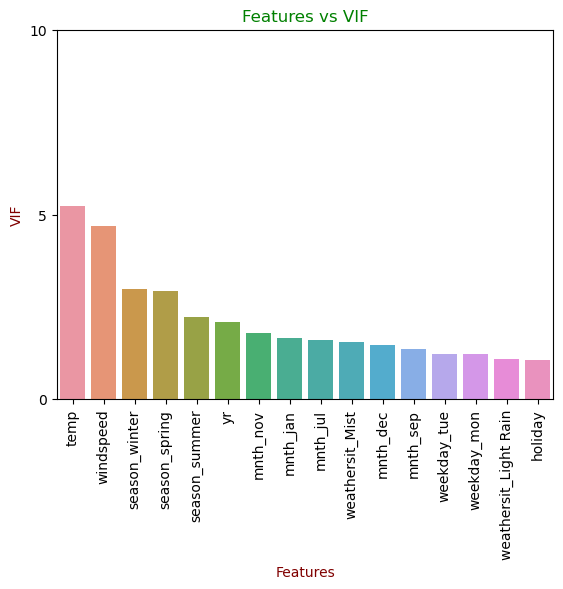

In [51]:
# Let's visualize the VIF values

sns.barplot(data=VIF,x='Features',y='VIF')
plt.title("Features vs VIF",color='green')
plt.xlabel("Features",color='maroon')
plt.ylabel("VIF",color='maroon')
plt.xticks(rotation=90)
plt.yticks([0,5,10])
plt.show()

## Residual Analysis

### Validating the assumptions

One assumption of Linear regression is that the error terms are normally distributed. Plotting the error terms to validate that

##### Normality

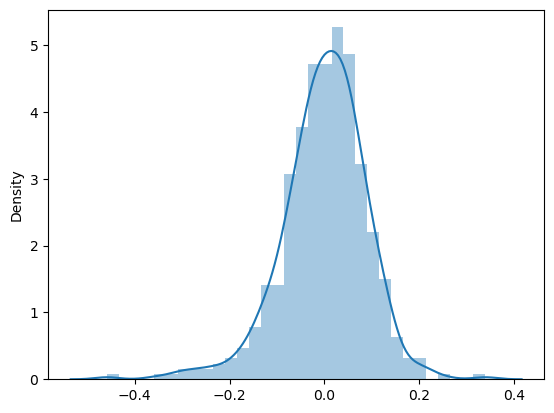

In [52]:
# we need to get the predicted y values for the x_train_new values

y_train_pred = model_10.predict(x_train_sm)

# Calculating the residuals

res_train = y_train - y_train_pred

# Plotting the residuals

sns.distplot(res_train)
plt.show()

The residuals when plotted indicates a normal distributions which validates our assumption 1

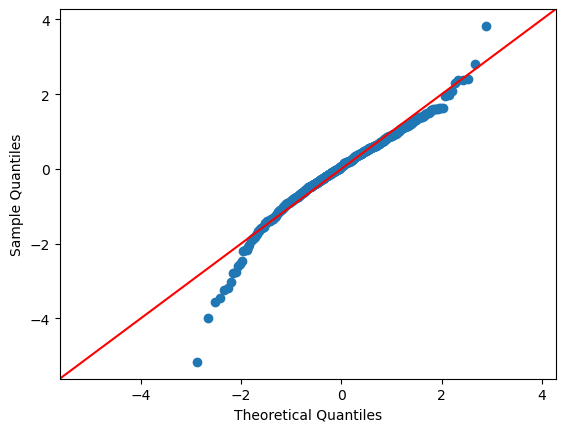

In [53]:
# Plot the qq-plot of the error terms
sm.qqplot(res_train, fit=True, line='45')
plt.show()

Major portion of datapoints fall on the 45 degree line. Means the errors terms are normally distributed

##### Homoscedasticity

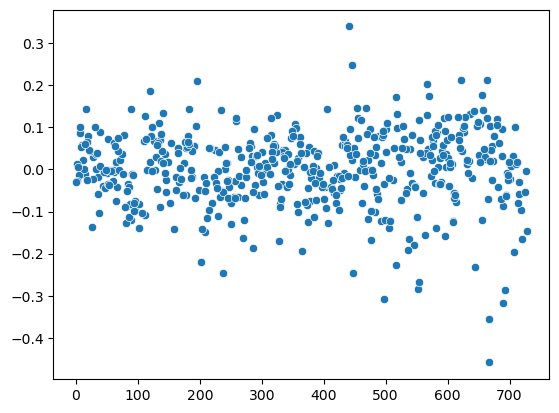

In [54]:
# Checking if the error terms are independent of each other

sns.scatterplot(res_train)
plt.show()

When plotted a scatterplot, the residuals does not show any pattern, which validates our assumption 2 that is the error terms are independent of each other

## Making predictions on test data

In [55]:
# Scaling the test dataset

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [56]:
y_test = df_test['cnt']
x_test = df_test[x_train_new.columns]

In [57]:
# Adding a constant for the prediction
x_test_sm = sm.add_constant(x_test)

# Predicting the y values using x_test 
y_test_pred = model_10.predict(x_test_sm)

# Checking the residuals
res_test = y_test - y_test_pred
res_test.head()

184    0.311465
535   -0.179560
299   -0.131796
221   -0.038562
152    0.007293
dtype: float64

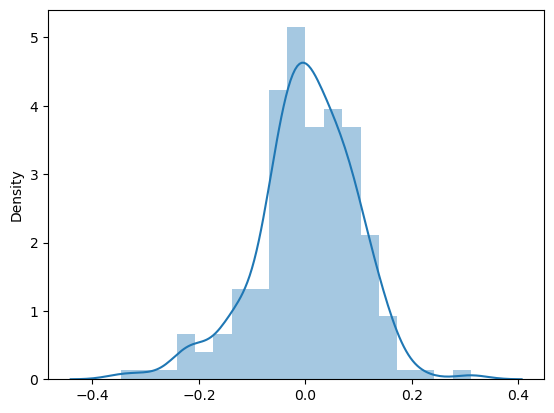

In [58]:
# Verifying if the model is working fine or not 

sns.distplot(res_test)
plt.show()

## Model Evaluation

In [59]:
# Importing the necessary library
from sklearn.metrics import r2_score

# Calculating the R squared for the train dataset
r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
print("R2 for train: ",round(r2_train,2))

# Calculating the R squared for the test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print("R2 for test: ",round(r2_test,2))

R2 for train:  0.84
R2 for test:  0.82


R2 squared value for both train and test data is very close, which means our model can explain unseen dataset as well

## Getting the cofficients of the final parameters

In [60]:
coeff = pd.DataFrame(model_10.params)
coeff.reset_index(inplace=True)
coeff.rename({'index':'Features',0:'Coeff'},axis=1,inplace=True)
coeff['Coeff'] = round(coeff['Coeff'],3)
coeff.sort_values(by='Coeff',ascending=False,inplace=True)

coeff

,Features,Coeff
3,temp,0.435
0,const,0.254
1,yr,0.234
7,season_winter,0.092
12,mnth_sep,0.069
6,season_summer,0.034
13,weekday_mon,-0.026
14,weekday_tue,-0.032
11,mnth_nov,-0.043
8,mnth_dec,-0.045


## Conclusion

The final equation from the model is: 

Count = 0.254+(0.435*temp)+(0.234*yr)+(0.092*season_winter)+(0.069*mnth_sep)+(0.034*season_summer)-(0.026*weekday_mon)-(0.032*weekday_tue)–(0.043*mnth_nov)–(0.045*mnth_dec)-(0.046*mnth_jul)–(0.05*mnth_jan)–(0.071*season_spring)-(0.082*weathersit_Mist)-(0.094*holiday)-(0.154*windspeed)-(0.296*weather_Light Rain)

Positive correlation indicate that the increase in that variable will increase the count variable

Negatively correlation indicates that the increase in that variable will decrease the count variable

Temperature, year and season_winter are the top 3 significant parameters in predicting the demand of boom bikes